# Project: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description  

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
The dataset contains the following columns:
- id
- imdb_id
- popularity
- budget
- revenue
- original_title
- cast
- homepage
- director
- tagline
- keywords
- overview
- runtime
- genres
- production_companies
- release_date
- vote_count
- vote_average
- release_year
- budget_adj
- revenue_adj

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
1. What kinds of properties are associated with movies that have high revenues?
2. Which main genres are most popular from year to year?
3. The best month to release movies based on popularity and revenue
4. Average Runtime Of Movies From Year To Year? Which length movies most liked by the audiences according to their popularity?
5. Top 20 directors based on movies released and profit
6. Top 10 most featured actors
7. Top 20 production companies based on movies released and lifetime profit
8. The movies with the highest and lowest profit
9. The movies with the highest budget
10. The movies with the highest revenue
11. The movies with the highest and lowest average rating?
12. The movies with the highest and lowest runtime

In [93]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


UsageError: Line magic function `%` not found.


In [94]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [95]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**The dataset summary statistics**

In [97]:
# basic statistics of the dataset

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**The dataset distribution**

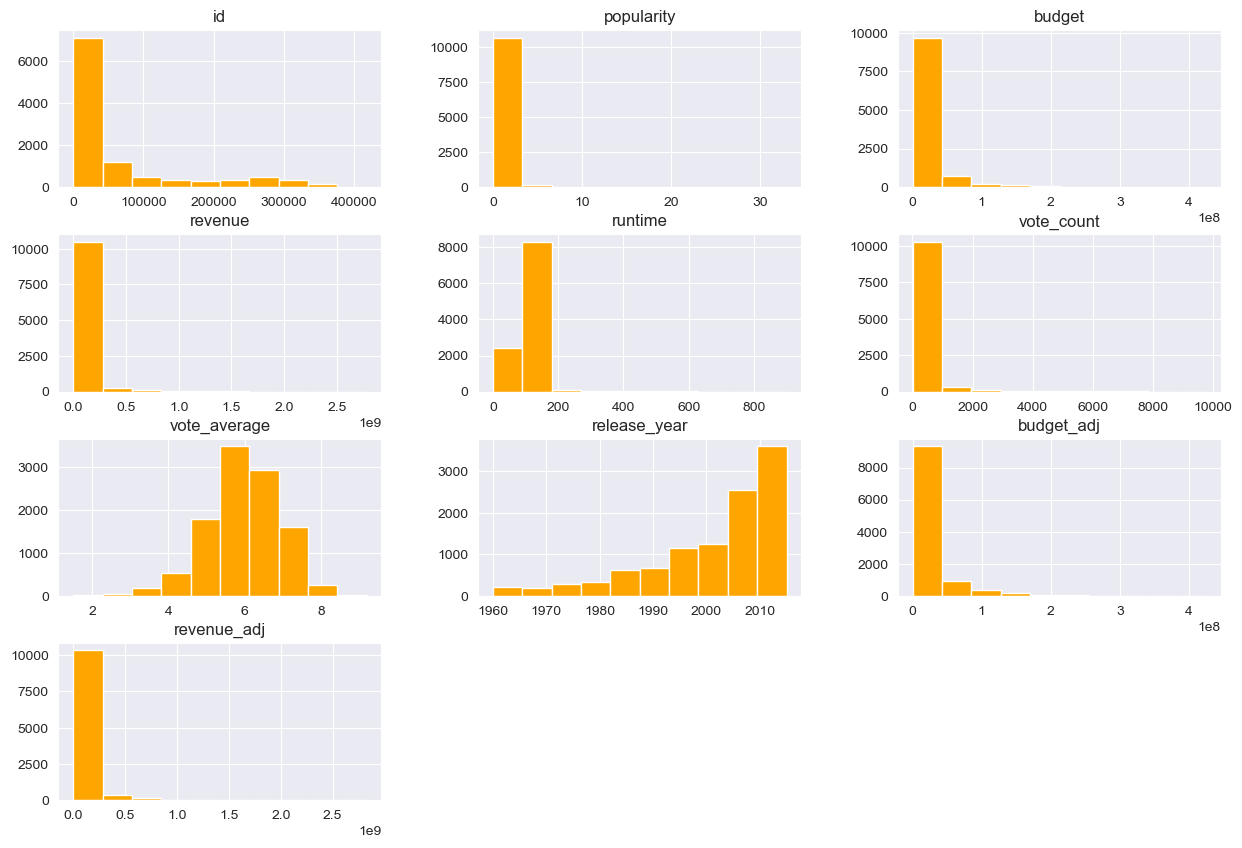

In [98]:
# plot an histogram of the numerical columns

df.hist(figsize=(15,10), color='orange');

- It appears that that a majority of budget and revenue entries fall between 0-100,000. That cannot be right, as every movie needs to have a budget. We will investigate this later.
- Movie releases increase with each year
- The majority of the columns are left-skewed. 


**Missing values**

In [99]:
# checking for missing values

df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

From above we identify columns with missing values. That include:
- imdb_id
- cast
- homepage
- director
- tagline
- keywords
- overview
- genres
- production_companies

**Duplicated rows**

In [100]:
# number of duplicated rows

print('Number of duplicated rows:', df.duplicated().sum())

Number of duplicated rows: 1


**Unique Original Title**

In [101]:
count = 0
for i in df.original_title.unique():
    count += 1
count

10571

There are 10571 unique original titles while we have 10866 rows. That means movies with the same name, which is quite normal. We can make each row in original title unique by combining it with an identifier (id or imdb id).


### Data Cleaning
We will perform the following operations to clean up the dataset:
1. Changing format of release date into datetime format
2. Remove columns that are not needed for this project
3. Remove rows with missing values
4. Investigate the number of 0s in budget_adj and revenue_adj
5. Check for duplicate rows and remove them
6. Combine original title and id columns and drop id and original title columns
 

**1. Change release_date datatype**

In [102]:
# changing release date datatype to datetime 

df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

**2. Remove columns that are not needed for this project**

We do not need the following columns for this project:
1. imdb id
2. budget
3. revenue
4. homepage
5. tagline
6. keywords
7. overview

In [103]:
# removing the columns not required for this project
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


**3. Remove rows with missing values**

In [104]:
#check for missing values

df.isna().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [105]:
# remove missing values
df.dropna(inplace=True)
df.isna().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

**4. Investigate the number of 0s in budget_adj and revenue_adj**

In [106]:
# reviewing the basic statistics for the numerical columns

df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9.773000e+03,9.773000e+03
mean,63187.492479,0.694711,102.925509,239.298782,5.963430,2000.879362,1.941707e+07,5.704735e+07
std,90713.666750,1.036879,27.876224,602.982068,0.913179,13.036453,3.566467e+07,1.514432e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10222.000000,0.232756,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18681.000000,0.419765,100.000000,46.000000,6.000000,2005.000000,3.114254e+05,0.000000e+00
75%,70577.000000,0.776380,112.000000,173.000000,6.600000,2011.000000,2.469335e+07,4.311344e+07
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


The budget_adj, and revenue_adj appears to contain a huge amount of 0s. That could be missing values replaced with 0. Let's check the number of rows with 0 in budget and revenue.

In [107]:
budget_shape = df.query('budget_adj==0').shape[0]
revenue_shape = df.query('revenue_adj==0').shape[0]
print('The number of rows with 0 in budget_adj: ', budget_shape, "\n"'The number of rows with 0 in revenue_adj: ', revenue_shape)

The number of rows with 0 in budget_adj:  4751 
The number of rows with 0 in revenue_adj:  5022


A majority of the values in budget and revenue columns are 0s.
- We cannot drop them as it may significantly impact our analyses
- We can replace them with the mean. But that may affect the distribution.

For this project, we will replace the 0s with null values.

In [108]:
df['budget_adj'] = df['budget_adj'].replace(0, np.nan)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.nan)

**5. Check for duplicate rows and remove them**

In [109]:
# check for duplicates

df.duplicated().sum()

1

In [110]:
# drop duplicates

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

**6. Combine original title and id columns and drop id and original title columns**

In [111]:
# combine original title and id columns

df['movie_title'] = df['original_title'] + '-' + df['id'].astype(str)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_title
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Mad Max: Fury Road-76341
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Insurgent-262500
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Star Wars: The Force Awakens-140607
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Furious 7-168259


In [112]:
# drop id and original title column

df = df.drop(['id', 'original_title'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9772 non-null   float64       
 1   cast                  9772 non-null   object        
 2   director              9772 non-null   object        
 3   runtime               9772 non-null   int64         
 4   genres                9772 non-null   object        
 5   production_companies  9772 non-null   object        
 6   release_date          9772 non-null   datetime64[ns]
 7   vote_count            9772 non-null   int64         
 8   vote_average          9772 non-null   float64       
 9   release_year          9772 non-null   int64         
 10  budget_adj            5021 non-null   float64       
 11  revenue_adj           4750 non-null   float64       
 12  movie_title           9772 non-null   object        
dtypes: datetime64[ns]

**This is the final dataset for this project:**

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9772 non-null   float64       
 1   cast                  9772 non-null   object        
 2   director              9772 non-null   object        
 3   runtime               9772 non-null   int64         
 4   genres                9772 non-null   object        
 5   production_companies  9772 non-null   object        
 6   release_date          9772 non-null   datetime64[ns]
 7   vote_count            9772 non-null   int64         
 8   vote_average          9772 non-null   float64       
 9   release_year          9772 non-null   int64         
 10  budget_adj            5021 non-null   float64       
 11  revenue_adj           4750 non-null   float64       
 12  movie_title           9772 non-null   object        
dtypes: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What kinds of properties are associated with movies that have high revenues?

First, we will check the columns that have positive relationship with revenue_adj using scatter plots

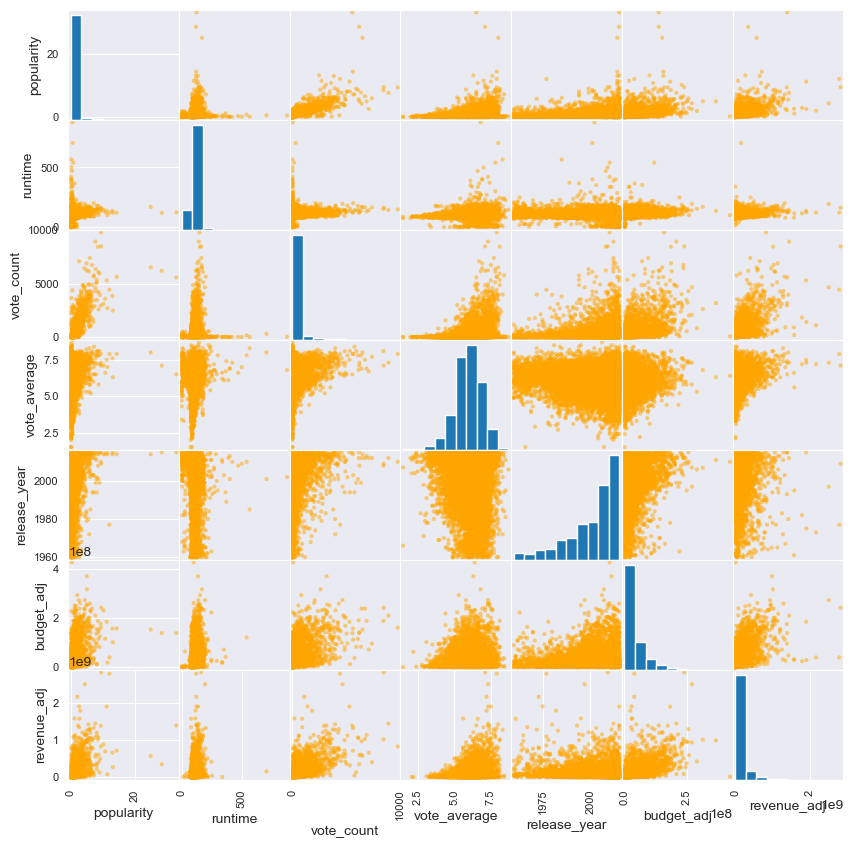

In [114]:
# scatter matrix of the dataset

pd.plotting.scatter_matrix(df, figsize=(10,10),grid=True, color='orange');



We can see a positive correlation between revenue_adj and the following:
- budget_adj
- vote_average
- vote_count
- runtime
- popularity.

We will investigate these relationships further using regplot and a correlation map

**Regplot between revenue_adj and the above-mentioned columns**

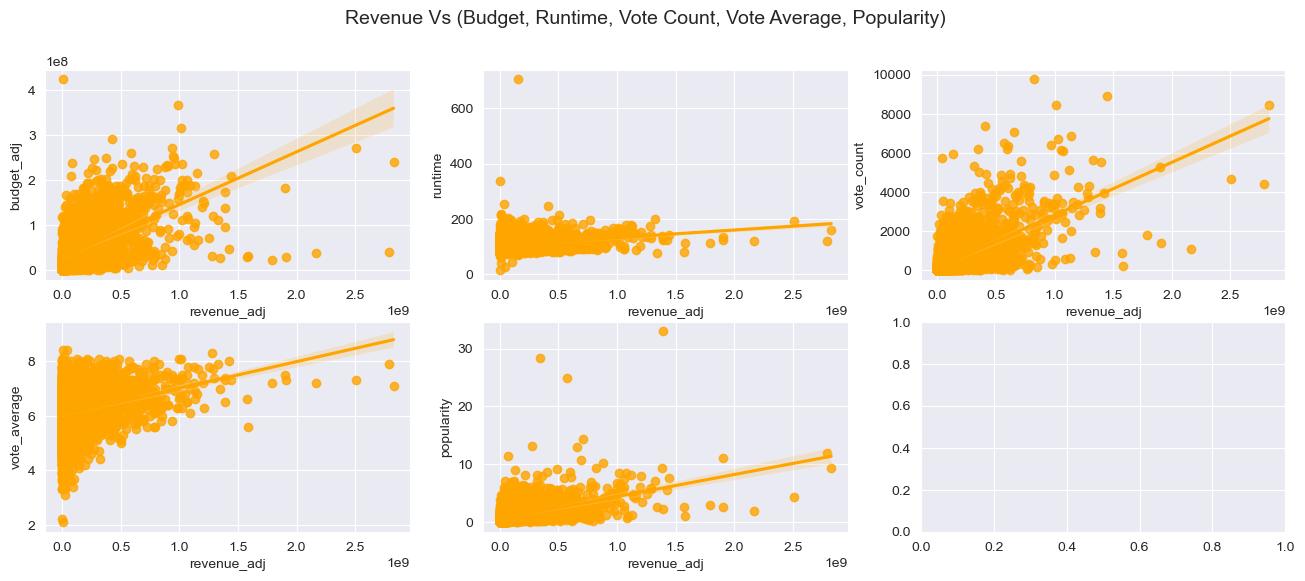

In [115]:
# plot a regplot

fig, axes = plt.subplots(2,3,figsize = (16,6))
sns.set_style("darkgrid")
fig.suptitle("Revenue Vs (Budget, Runtime, Vote Count, Vote Average, Popularity)",fontsize=14)
sns.regplot(x=df['revenue_adj'], y=df['budget_adj'], ax=axes[0][0], color='orange');
sns.regplot(x=df['revenue_adj'], y=df['runtime'], ax=axes[0][1], color='orange');
sns.regplot(x=df['revenue_adj'], y=df['vote_count'], ax=axes[0][2], color='orange');
sns.regplot(x=df['revenue_adj'], y=df['vote_average'], ax=axes[1][0], color='orange');
sns.regplot(x=df['revenue_adj'], y=df['popularity'], ax=axes[1][1], color='orange');

**Correlation Map**

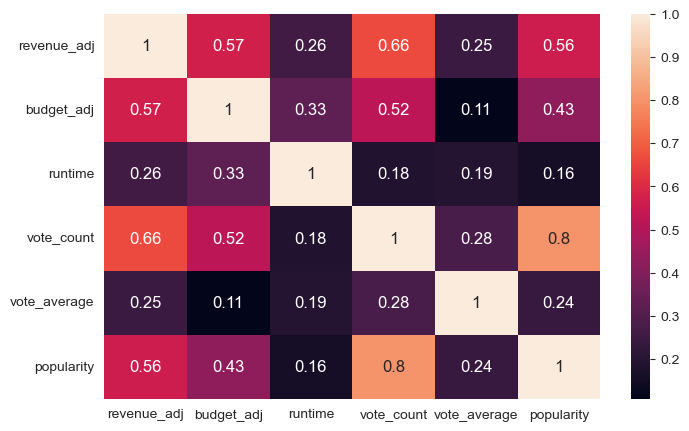

In [116]:
# create a dataframe that contains the columns we are investigating

key_properties = df[['revenue_adj', 'budget_adj', 'runtime', 'vote_count', 'vote_average', 'popularity']]

# create a correlation matrix and plot the heatmap

corr_matrix = key_properties.corr()
ax = plt.subplots( figsize =(8, 5))
sns.heatmap(corr_matrix, annot=True, annot_kws = {'fontsize' : 12})
plt.show()

**1. Revenue and Budget**

There is 0.57 correlation between revenue and budget. That implies that an increase in a movie budget may lead to an increase in revenue.

**2. Revenue and Runtime**

While their relationship is positive, there is no significant correlation (0.26) between movie length and revenue.

**3. Revenue and Vote Count**

There is 0.66 correlation between revenue and vote count. I deduce that may stem from the fact that vote count is highly correlated with popularity, which in turn is significantly correlated with revenue.

**4. Revenue and Vote Average**

The correlation between revenue and vote average is 0.25, which is not significant. That means a movie rating may have no significant impact on its revenue. 

**5. Revenue and Popularity**

There is 0.56 correlation between revenue and popularity. An increase in a movie popularity may lead to an increase in revenue.

### Research Question 2: Which main genres are most popular from year to year?

**Convert each row in the genres column to a list and create a new dataframe for the exploded data**

In [117]:
# convert rows to lists

df['genres'] = df.genres.str.split('|')

# create a new dataframe

genre_df = df.explode('genres', ignore_index=True)
genre_df.head()


,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_title
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397
1,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397
2,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397
3,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397
4,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Mad Max: Fury Road-76341


We will create a funtion to plot the data in a horizontal barchart. Since, we will be using the same plot several times in this project, it will help us avoid repetition.

In [118]:
def barplot(column, title=None, xlabel=None, ylabel=None, figsize=(10,6), color='orange'):
    #define the stylesheet
    sns.set_style('darkgrid')

    # plot the data on a bar chart

    column.plot(kind='barh', figsize=figsize, color=color);
    plt.title(title, fontsize = 14);
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12);
    plt.yticks(fontsize = 11)
    plt.show()

#### Genre releases

In [119]:
# count the number of entries for each genre

genre_releases = genre_df['genres'].value_counts()
genre_releases

Drama              4364
Comedy             3433
Thriller           2746
Action             2235
Romance            1570
Horror             1526
Adventure          1384
Crime              1299
Science Fiction    1136
Family             1095
Fantasy             840
Mystery             773
Animation           617
Music               339
Documentary         317
History             306
War                 258
Western             160
TV Movie            132
Foreign             120
Name: genres, dtype: int64

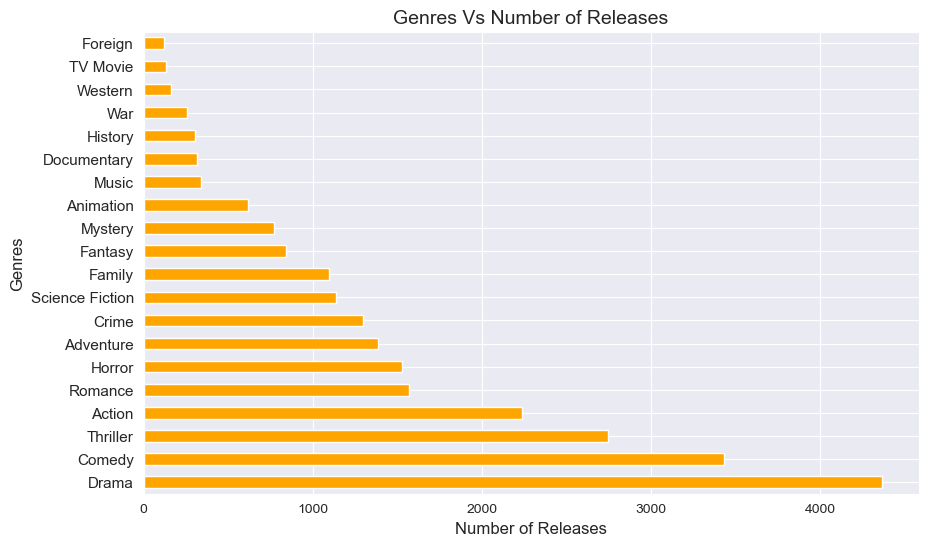

In [120]:
# plot the data

barplot(genre_releases, "Genres Vs Number of Releases", xlabel='Number of Releases', ylabel='Genres')

**Conclusion:** Drama is the most released genre of all time (4364 releases), followed by Comedy, Thriller, Action, and Romance.

#### Genre Popularity

In [121]:
# group average popularity by genre

genre_popularity = genre_df.groupby('genres')['popularity'].mean().sort_values(ascending=False)

print('Top 10 Genres Based On Popularity:')
genre_popularity[:10]

Top 10 Genres Based On Popularity:


genres
Adventure          1.209053
Science Fiction    1.065278
Fantasy            1.056310
Action             0.968256
Animation          0.914281
Family             0.846467
Thriller           0.772172
Crime              0.767337
War                0.752777
Mystery            0.713596
Name: popularity, dtype: float64

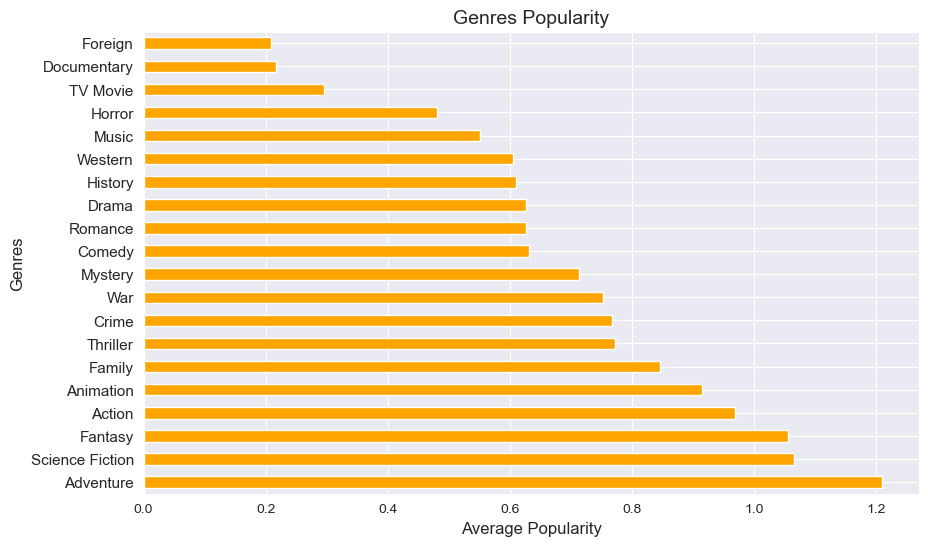

In [122]:
# plot the data

barplot(genre_popularity, "Genres Popularity", xlabel='Average Popularity', ylabel='Genres')

**Conclusion:** The most popular genres are Adventure, Science Fiction, Fantasy, Action, and Animation

#### Genre Trends Over The Years

In [123]:
#group average popularity by genres and release year

genre_grouped = genre_df.groupby(['genres', 'release_year'])['popularity'].mean()
genre_grouped

genres   release_year
Action   1960            0.590724
         1961            0.365913
         1962            0.845972
         1963            0.951729
         1964            0.813087
                           ...   
Western  2011            1.175800
         2012            2.242083
         2013            0.665255
         2014            0.775435
         2015            3.178796
Name: popularity, Length: 1042, dtype: float64

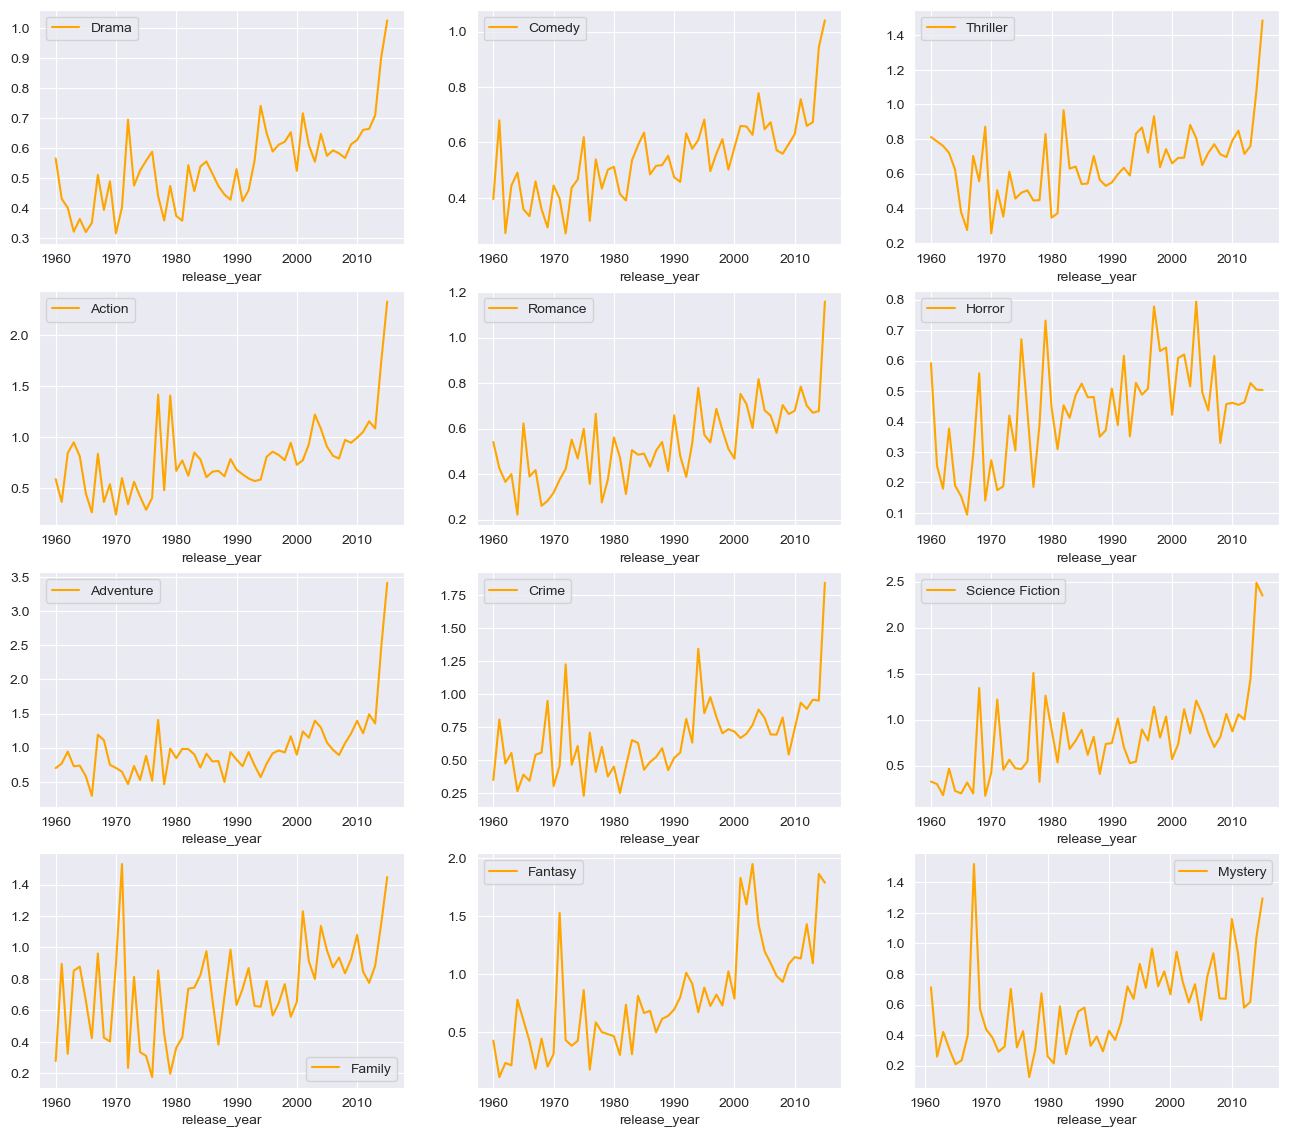

In [124]:
#plot the data for 12 top genres by number of releases

fig, ax = plt.subplots(4,3,figsize = (16,14))
genre_grouped['Drama'].plot(label = "Drama", ax = ax[0][0],legend=True, color='orange');
genre_grouped['Comedy'].plot(label = "Comedy", ax = ax[0][1],legend=True, color='orange');
genre_grouped['Thriller'].plot(label = "Thriller", ax = ax[0][2],legend=True, color='orange');
genre_grouped['Action'].plot(label = "Action", ax = ax[1][0],legend=True, color='orange');
genre_grouped['Romance'].plot(label = "Romance", ax = ax[1][1],legend=True, color='orange');
genre_grouped['Horror'].plot(label = "Horror", ax = ax[1][2],legend=True, color='orange');
genre_grouped['Adventure'].plot(label = "Adventure", ax = ax[2][0],legend=True, color='orange');
genre_grouped['Crime'].plot(label = "Crime", ax = ax[2][1],legend=True, color='orange');
genre_grouped['Science Fiction'].plot(label = "Science Fiction", ax = ax[2][2],legend=True, color='orange');
genre_grouped['Family'].plot(label = "Family", ax = ax[3][0],legend=True, color='orange');
genre_grouped['Fantasy'].plot(label = "Fantasy", ax = ax[3][1],legend=True, color='orange');
genre_grouped['Mystery'].plot(label = "Mystery", ax = ax[3][2],legend=True, color='orange');

**Conclusion:** We can an upward trend for all the plotted genres, aside Horror.

### Research Question 3: The best month to release movies based on popularity and revenue

#### Best Months Based On Popularity

In [125]:
# group average popularity by month

month_popularity = df.groupby(df.release_date.dt.month)['popularity'].mean()

print('The Most Popular Months For Movie Releases:')
month_popularity.sort_values(ascending=False)

The Most Popular Months For Movie Releases:


release_date
6     0.850622
7     0.813208
11    0.804622
12    0.802915
5     0.801210
3     0.694825
10    0.655249
2     0.625916
8     0.617720
4     0.599827
9     0.598890
1     0.523490
Name: popularity, dtype: float64

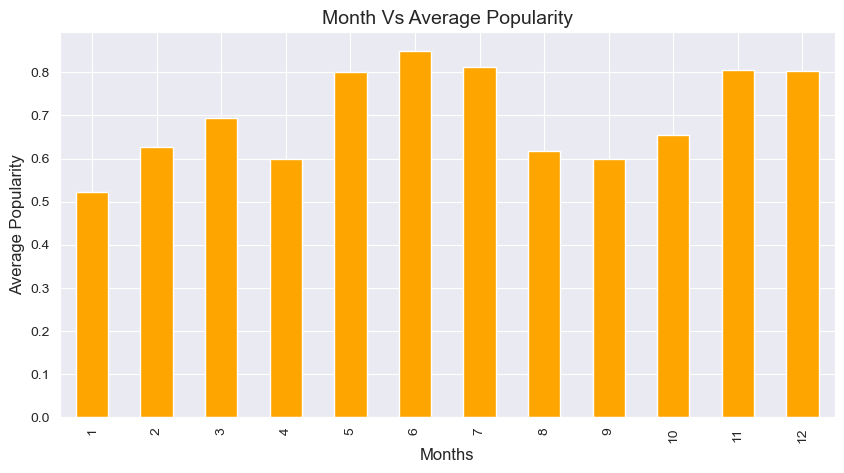

In [126]:
# plot the data

sns.set_style('darkgrid')
month_popularity.plot(kind='bar', figsize=(10,5), color='orange');
plt.title('Month Vs Average Popularity', fontsize = 14);
plt.xlabel('Months', fontsize = 12)
plt.ylabel('Average Popularity', fontsize = 12);


**Conclusion:** 

The best months based on popularity are June, July, November, December, and May. Movie makers and marketers can expect a huge audience turnout rate when they release their movies in those months. 

January, September, and April are unpopular with audiences.

#### Best Months Based On Revenue

In [127]:
# group average revenue by month

month_revenue = df.groupby(df.release_date.dt.month)['revenue_adj'].mean()

print('Best Months Based On Revenue:')
month_revenue.sort_values(ascending=False)


Best Months Based On Revenue:


release_date
6     1.997173e+08
12    1.730453e+08
5     1.708243e+08
11    1.633747e+08
7     1.564145e+08
3     1.115630e+08
4     9.358590e+07
10    8.566923e+07
8     7.661652e+07
2     7.420432e+07
1     6.043833e+07
9     5.197632e+07
Name: revenue_adj, dtype: float64

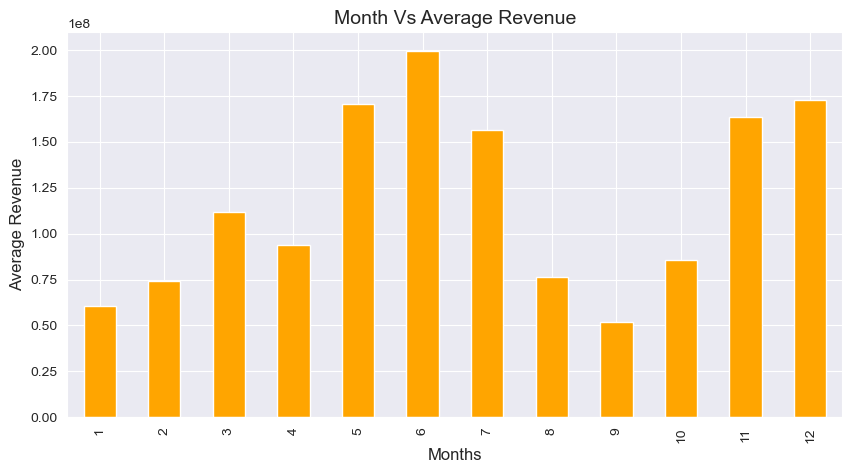

In [128]:
# plot the data

sns.set_style('darkgrid')
month_revenue.plot(kind='bar', figsize=(10,5), color='orange');
plt.title('Month Vs Average Revenue', fontsize = 14);
plt.xlabel('Months', fontsize = 12)
plt.ylabel('Average Revenue', fontsize = 12);


**Conclusion:**

The best months to release movies based on revenue are:
- June
- December
- May
- November
- July

### Research Question 4: Average runtime of movies from year to year? Which movie length most liked by the audiences according to their popularity?

#### Average Runtime of Movies From Year To Year

In [129]:
# group average runtime by year

year_runtime = df.groupby('release_year')['runtime'].mean()

print('Average Runtime For The Last Five Years:')
year_runtime.sort_values(ascending=False).tail()

Average Runtime For The Last Five Years:


release_year
2009    98.810127
2012    98.742972
2011    98.442982
2013    97.698413
2015    97.281362
Name: runtime, dtype: float64

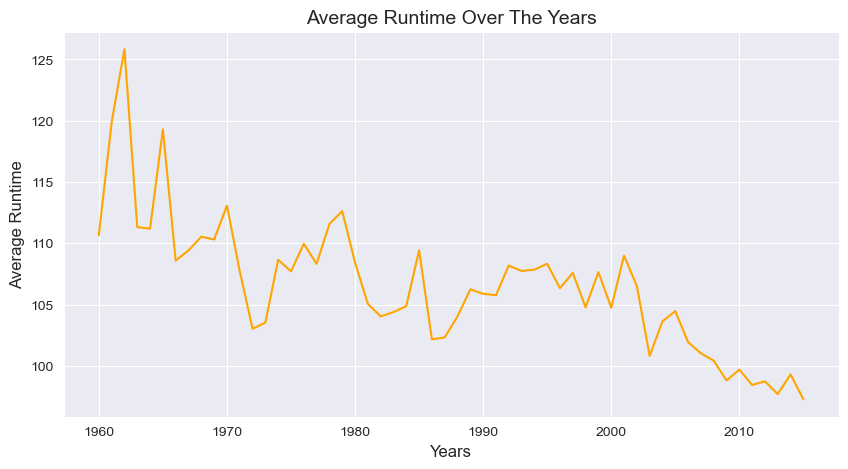

In [130]:
# plot the data

sns.set_style('darkgrid')
year_runtime.plot(figsize=(10,5), color='orange');
plt.title('Average Runtime Over The Years', fontsize = 14);
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Average Runtime', fontsize = 12);

**Conclusion:** Average runtime has been steadily reducing over the years. But are the audiences happy with short movie lengths? We will investigate that in the next plot.

#### Movie Lengths That Are Popular With Audiences

In [131]:
# group average popularity by runtime

popularity_runtime = df.groupby('runtime')['popularity'].mean()

print('Runtime Based On Average Popularity:')
popularity_runtime

Runtime Based On Average Popularity:


runtime
0      0.285448
3      0.286234
4      0.505364
5      0.526701
6      0.265551
         ...   
500    0.102223
540    0.757082
566    0.147489
705    0.537593
877    0.469332
Name: popularity, Length: 224, dtype: float64

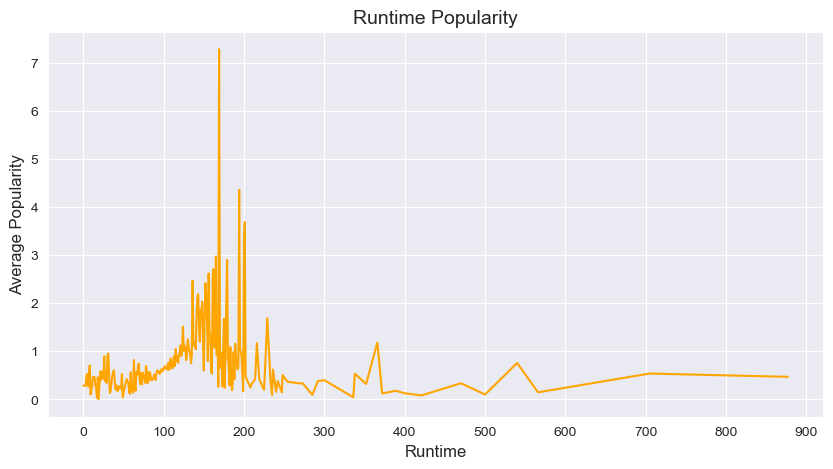

In [132]:
# plot the data

sns.set_style('darkgrid')
popularity_runtime.plot(figsize=(10,5), color='orange', xticks=np.arange(0,1000,100));
plt.title('Runtime Popularity', fontsize = 14);
plt.xlabel('Runtime', fontsize = 12)
plt.ylabel('Average Popularity', fontsize = 12);


**Conclusion:** Movies between 100-200 runtime are more popular with audiences. The audience demand for shorter movie length may have contributed to the reduction in runtime over the years.

### Research Question 5: Top 20 directors based on movies released and profit

We need to create a profit column by subtracting budget from revenue

In [133]:
# creating a profit column

df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9772 non-null   float64       
 1   cast                  9772 non-null   object        
 2   director              9772 non-null   object        
 3   runtime               9772 non-null   int64         
 4   genres                9772 non-null   object        
 5   production_companies  9772 non-null   object        
 6   release_date          9772 non-null   datetime64[ns]
 7   vote_count            9772 non-null   int64         
 8   vote_average          9772 non-null   float64       
 9   release_year          9772 non-null   int64         
 10  budget_adj            5021 non-null   float64       
 11  revenue_adj           4750 non-null   float64       
 12  movie_title           9772 non-null   object        
 13  profit_adj       

Convert each row in the director column to a list and create a new dataframe for the exploded data

In [134]:
#cleaning the director column

df['director'] = df.director.str.split('|')
director_df = df.explode('director', ignore_index=True)
director_df

,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_title,profit_adj
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397,1.254446e+09
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Mad Max: Fury Road-76341,2.101614e+08
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Insurgent-262500,1.704191e+08
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Star Wars: The Force Awakens-140607,1.718723e+09
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Furious 7-168259,1.210949e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,0.080598,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,[Documentary],Bruce Brown Films,2066-06-15,11,7.4,1966,NaN,NaN,The Endless Summer-21,NaN
10704,0.065543,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,"[Action, Adventure, Drama]",Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,NaN,NaN,Grand Prix-20379,NaN
10705,0.065141,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,"[Mystery, Comedy]",Mosfilm,2066-01-01,11,6.5,1966,NaN,NaN,Beregis Avtomobilya-39768,NaN
10706,0.064317,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,"[Action, Comedy]",Benedict Pictures Corp.,2066-11-02,22,5.4,1966,NaN,NaN,"What's Up, Tiger Lily?-21449",NaN


#### Top 20 Movie Directors Based On Number of Movies Released

In [135]:
# count the number of times a director appear in the dataset

director_movies = director_df['director'].value_counts()

print('The Top 20 Movie Directors Based On Number of Movies Released:')
director_movies[:20]

The Top 20 Movie Directors Based On Number of Movies Released:


Woody Allen             43
Clint Eastwood          34
Steven Spielberg        30
Martin Scorsese         28
Steven Soderbergh       23
Ridley Scott            23
Ron Howard              22
Joel Schumacher         21
Brian De Palma          20
Wes Craven              19
Robert Rodriguez        19
Tim Burton              19
David Cronenberg        19
John Carpenter          19
Barry Levinson          19
Mike Nichols            18
Francis Ford Coppola    18
Walter Hill             18
Robert Zemeckis         17
Roman Polanski          17
Name: director, dtype: int64

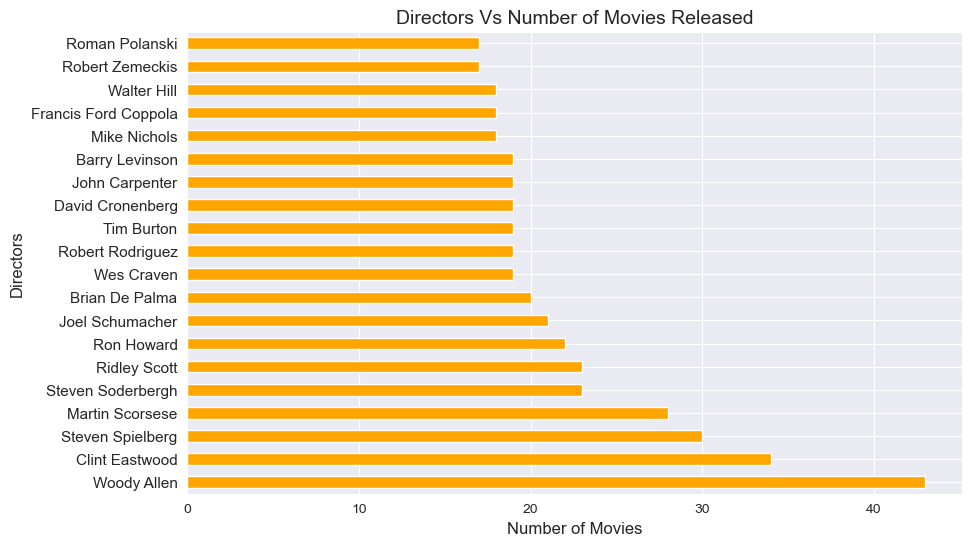

In [136]:
# plot the data

barplot(director_movies[:20], "Directors Vs Number of Movies Released", xlabel='Number of Movies', ylabel='Directors')

**Conclusion:** Woody Allen leads the group with 43 movies directed. He is followed by Clint Eastwood (34) and Steven Spielberg (30).

#### Most Profitable Directors

In [137]:
# group total profit by director

director_profit = director_df.groupby('director')['profit_adj'].sum().sort_values(ascending=False)

print('Top 20 Most Profitable Directors:')
director_profit[:20]

Top 20 Most Profitable Directors:


director
Steven Spielberg       1.316861e+10
James Cameron          6.296578e+09
George Lucas           5.844159e+09
Peter Jackson          5.645492e+09
Robert Zemeckis        4.335995e+09
Chris Columbus         4.171046e+09
Michael Bay            3.958676e+09
Wolfgang Reitherman    3.490935e+09
David Yates            3.394430e+09
Tim Burton             3.286788e+09
Christopher Nolan      3.149568e+09
Roland Emmerich        2.971858e+09
Lee Unkrich            2.845212e+09
Carlos Saldanha        2.786971e+09
Ron Howard             2.720393e+09
J.J. Abrams            2.689650e+09
Gore Verbinski         2.656453e+09
Sam Raimi              2.614455e+09
Guy Hamilton           2.607512e+09
Clint Eastwood         2.494672e+09
Name: profit_adj, dtype: float64

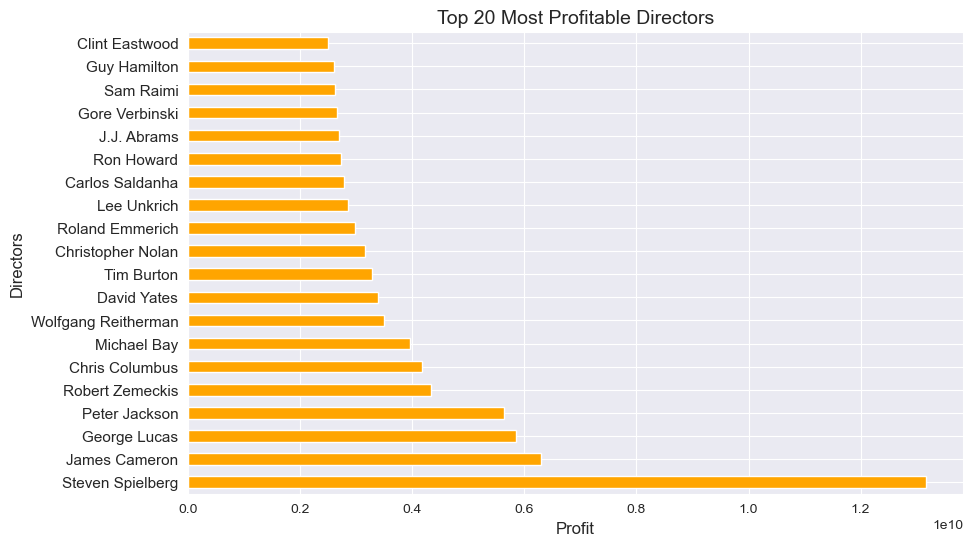

In [138]:
# plot the data

barplot(director_profit[:20], "Top 20 Most Profitable Directors", xlabel='Profit', ylabel='Directors')

**Conclusion:** Steven Spielberg, James Cameron, and George Lucas are the most profitable directors in this dataset.

### Research Question 6: Top 10 most featured actors

Convert each row in the cast column to a list and create a new dataframe for the exploded data

In [139]:
# clean the cast column
df['cast'] = df.cast.str.split('|')
cast_df = df.explode('cast', ignore_index=True)
cast_df

,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_title,profit_adj
0,32.985763,Chris Pratt,[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397,1.254446e+09
1,32.985763,Bryce Dallas Howard,[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397,1.254446e+09
2,32.985763,Irrfan Khan,[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397,1.254446e+09
3,32.985763,Vincent D'Onofrio,[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397,1.254446e+09
4,32.985763,Nick Robinson,[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397,1.254446e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48015,0.035919,Harold P. Warren,[Harold P. Warren],74,[Horror],Norm-Iris,2066-11-15,15,1.5,1966,1.276423e+05,NaN,Manos: The Hands of Fate-22293,NaN
48016,0.035919,Tom Neyman,[Harold P. Warren],74,[Horror],Norm-Iris,2066-11-15,15,1.5,1966,1.276423e+05,NaN,Manos: The Hands of Fate-22293,NaN
48017,0.035919,John Reynolds,[Harold P. Warren],74,[Horror],Norm-Iris,2066-11-15,15,1.5,1966,1.276423e+05,NaN,Manos: The Hands of Fate-22293,NaN
48018,0.035919,Diane Mahree,[Harold P. Warren],74,[Horror],Norm-Iris,2066-11-15,15,1.5,1966,1.276423e+05,NaN,Manos: The Hands of Fate-22293,NaN


In [140]:
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48020 entries, 0 to 48019
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            48020 non-null  float64       
 1   cast                  48020 non-null  object        
 2   director              48020 non-null  object        
 3   runtime               48020 non-null  int64         
 4   genres                48020 non-null  object        
 5   production_companies  48020 non-null  object        
 6   release_date          48020 non-null  datetime64[ns]
 7   vote_count            48020 non-null  int64         
 8   vote_average          48020 non-null  float64       
 9   release_year          48020 non-null  int64         
 10  budget_adj            24994 non-null  float64       
 11  revenue_adj           23647 non-null  float64       
 12  movie_title           48020 non-null  object        
 13  profit_adj      

#### Most Featured Actors

In [141]:
# count the number of times an actor appear in the dataset

actor_movies = cast_df['cast'].value_counts().sort_values(ascending=False)

print('The Top Ten Most Featured Actors Are:')
actor_movies[:10]

The Top Ten Most Featured Actors Are:


Robert De Niro       72
Samuel L. Jackson    70
Bruce Willis         62
Nicolas Cage         61
Michael Caine        52
Robin Williams       51
Morgan Freeman       49
John Goodman         48
John Cusack          48
Liam Neeson          47
Name: cast, dtype: int64

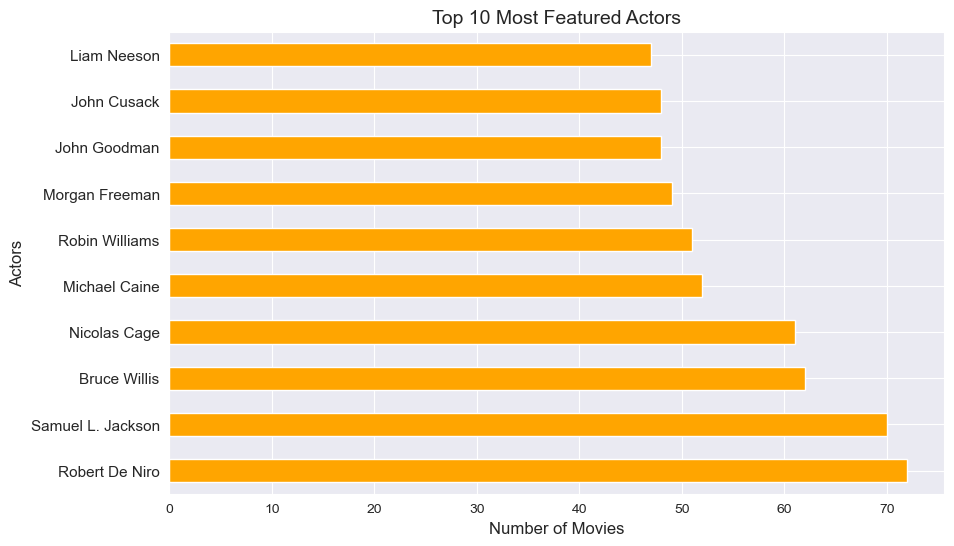

In [142]:
# plot the data

barplot(actor_movies[:10], "Top 10 Most Featured Actors", xlabel='Number of Movies', ylabel='Actors')

**Conclusion:** The most featured actors are Robert De Niro (72), Samuel L. Jackson (70), and Bruce Willis (62).

## Research Question 7: Top 20 production companies based on movies released and lifetime profit

Convert each row in the production companies column to a list and create a new dataframe for the exploded data

In [143]:
# clean the production companies column

df['production_companies'] = df.production_companies.str.split('|')
production_company_df = df.explode('production_companies', ignore_index=True)
production_company_df

,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_title,profit_adj
0,32.985763,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397,1.254446e+09
1,32.985763,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",Amblin Entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397,1.254446e+09
2,32.985763,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",Legendary Pictures,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397,1.254446e+09
3,32.985763,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",Fuji Television Network,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397,1.254446e+09
4,32.985763,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",Dentsu,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World-135397,1.254446e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23138,0.065543,"[James Garner, Eva Marie Saint, Yves Montand, ...",[John Frankenheimer],176,"[Action, Adventure, Drama]",Joel Productions,2066-12-21,20,5.7,1966,NaN,NaN,Grand Prix-20379,NaN
23139,0.065543,"[James Garner, Eva Marie Saint, Yves Montand, ...",[John Frankenheimer],176,"[Action, Adventure, Drama]",Douglas & Lewis Productions,2066-12-21,20,5.7,1966,NaN,NaN,Grand Prix-20379,NaN
23140,0.065141,"[Innokentiy Smoktunovskiy, Oleg Efremov, Georg...",[Eldar Ryazanov],94,"[Mystery, Comedy]",Mosfilm,2066-01-01,11,6.5,1966,NaN,NaN,Beregis Avtomobilya-39768,NaN
23141,0.064317,"[Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama,...",[Woody Allen],80,"[Action, Comedy]",Benedict Pictures Corp.,2066-11-02,22,5.4,1966,NaN,NaN,"What's Up, Tiger Lily?-21449",NaN


#### Top 20 Production Companies Based On Movies Released

In [144]:
# count the number of times a production company appear in the dataset

prod_company = production_company_df['production_companies'].value_counts().sort_values(ascending=False)

print('The Top 20 Production Companies Based On Movies Released:')
prod_company[:20]


The Top 20 Production Companies Based On Movies Released:


Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
TriStar Pictures                          147
Miramax Films                             139
Relativity Media                          108
Regency Enterprises                        95
Canal+                                     92
DreamWorks SKG                             88
Village Roadshow Pictures                  88
20th Century Fox                           88
BBC Films                                  87
Dimension Films                            82
Name: production_companies, dtype: int64

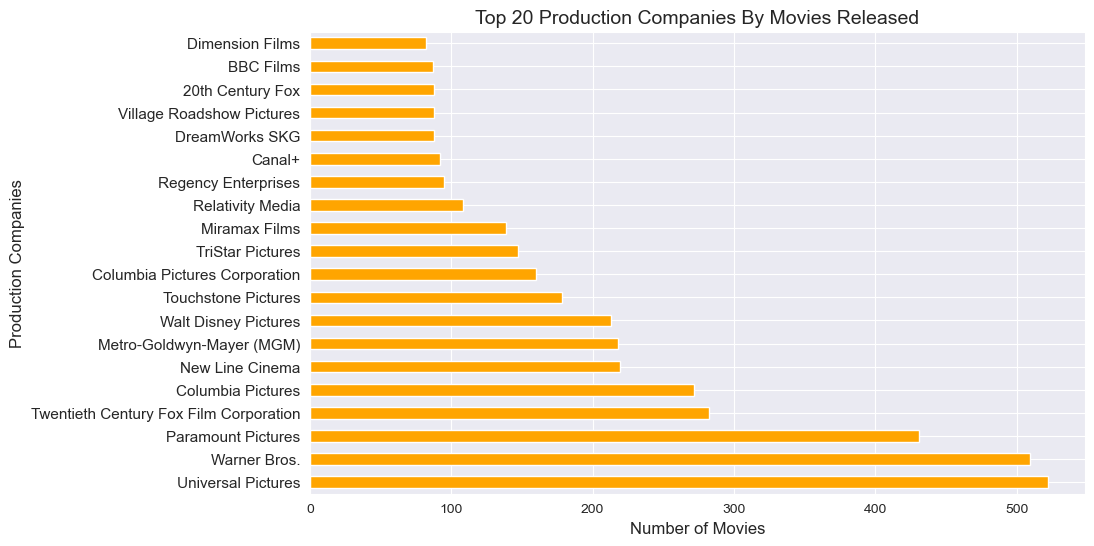

In [145]:
# plot the data

barplot(prod_company[:20], "Top 20 Production Companies By Movies Released", xlabel='Number of Movies', ylabel='Production Companies')

**Conclusion:** The top production companies with the highest number of movies released are Universal Pictures (522), Warner Bros. (509), and Paramount Pictures (431).

#### The Most Profitable Production Companies

In [146]:
# group total profit by production companies

prod_company_profit = production_company_df.groupby('production_companies')['profit_adj'].sum().sort_values(ascending=False)
print('The Top 20 Production Companies Based On Lifetime Profit:')
prod_company_profit[:20]

The Top 20 Production Companies Based On Lifetime Profit:


production_companies
Warner Bros.                              4.392299e+10
Universal Pictures                        4.261918e+10
Paramount Pictures                        3.810520e+10
Twentieth Century Fox Film Corporation    3.775190e+10
Walt Disney Pictures                      2.555429e+10
Columbia Pictures                         2.031701e+10
Amblin Entertainment                      1.639077e+10
New Line Cinema                           1.591263e+10
Metro-Goldwyn-Mayer (MGM)                 1.344559e+10
Lucasfilm                                 1.308225e+10
DreamWorks SKG                            1.151110e+10
Columbia Pictures Corporation             1.101265e+10
Eon Productions                           1.047773e+10
Touchstone Pictures                       9.737608e+09
DreamWorks Animation                      8.748927e+09
Heyday Films                              8.423466e+09
Village Roadshow Pictures                 8.318186e+09
Relativity Media                          8.

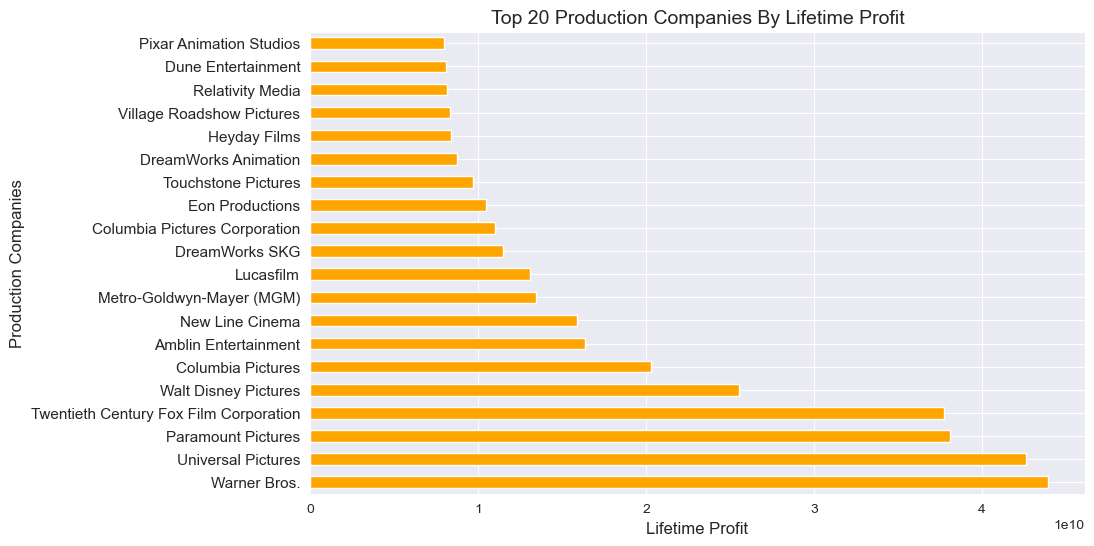

In [147]:
# plot the data

barplot(prod_company_profit[:20], "Top 20 Production Companies By Lifetime Profit", xlabel='Lifetime Profit', ylabel='Production Companies')

**Conclusion:** The top 3 production companies with the most movies released are also the ones that made the most profit. They are Warner Bros., Universal Pictures, and Paramount Pictures.

### Research Question 8: The movies with the highest and lowest profit

In [148]:
# group total profit by original title

movies_profit = df.groupby('movie_title')['profit_adj'].sum().sort_values(ascending=False)

# print the most and least profitable movies

print('Details on the most and least profitable movies:')

a = df[df['profit_adj'] == movies_profit.max()].transpose()
b = df[df['profit_adj'] == movies_profit.min()].transpose()
pd.concat([a,b], axis = 1)

Details on the most and least profitable movies:


,1329,2244
popularity,12.037933,0.25054
cast,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...","[Kate Bosworth, Jang Dong-gun, Geoffrey Rush, ..."
director,[George Lucas],[Sngmoo Lee]
runtime,121,100
genres,"[Adventure, Action, Science Fiction]","[Adventure, Fantasy, Action, Western, Thriller]"
production_companies,"[Lucasfilm, Twentieth Century Fox Film Corpora...",[Boram Entertainment Inc.]
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
vote_count,4428,74
vote_average,7.9,6.4
release_year,1977,2010


In [149]:
print('The most profitable movie is:', movies_profit.idxmax(), 'with', round(movies_profit.max()))
print('The least profitable movie is:', movies_profit.idxmin(), 'with', round(movies_profit.min()))

The most profitable movie is: Star Wars-11 with 2750136651
The least profitable movie is: The Warrior's Way-46528 with -413912431


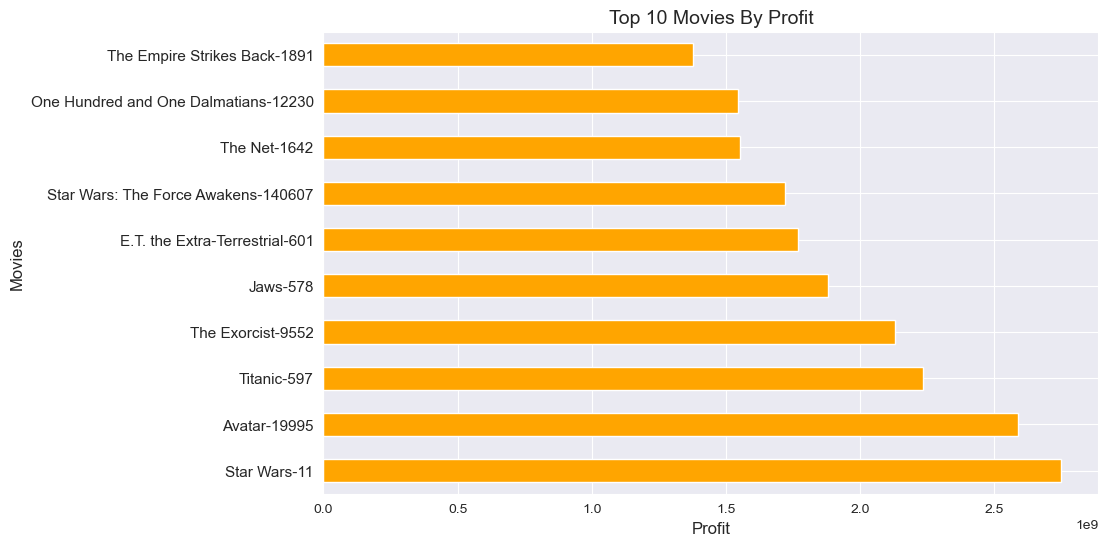

In [150]:
# plot the data

barplot(movies_profit[:10], "Top 10 Movies By Profit", xlabel='Profit', ylabel='Movies')

**Conclusion:** The most profitable movies in this dataset are George Lucas' Star Wars and James Cameron's Avatar and Titanic. It is interesting to note that the movie with the highest budget in this dataset is also the movie with the biggest loss (The Warrior's Way).

### Research Question 9: The movies with the highest budget

In [151]:
# group budget by original title

movies_budget = df.groupby('movie_title')['budget_adj'].sum().sort_values(ascending=False)

# print top 10 movies with the highest budget

print('Movies with the highest budget are:')
print(movies_budget[:10])

Movies with the highest budget are:
movie_title
The Warrior's Way-46528                             4.250000e+08
Pirates of the Caribbean: On Stranger Tides-1865    3.683713e+08
Pirates of the Caribbean: At World's End-285        3.155006e+08
Superman Returns-1452                               2.920507e+08
Titanic-597                                         2.716921e+08
Spider-Man 3-559                                    2.713305e+08
Tangled-38757                                       2.600000e+08
Avengers: Age of Ultron-99861                       2.575999e+08
Harry Potter and the Half-Blood Prince-767          2.541001e+08
Waterworld-9804                                     2.504192e+08
Name: budget_adj, dtype: float64


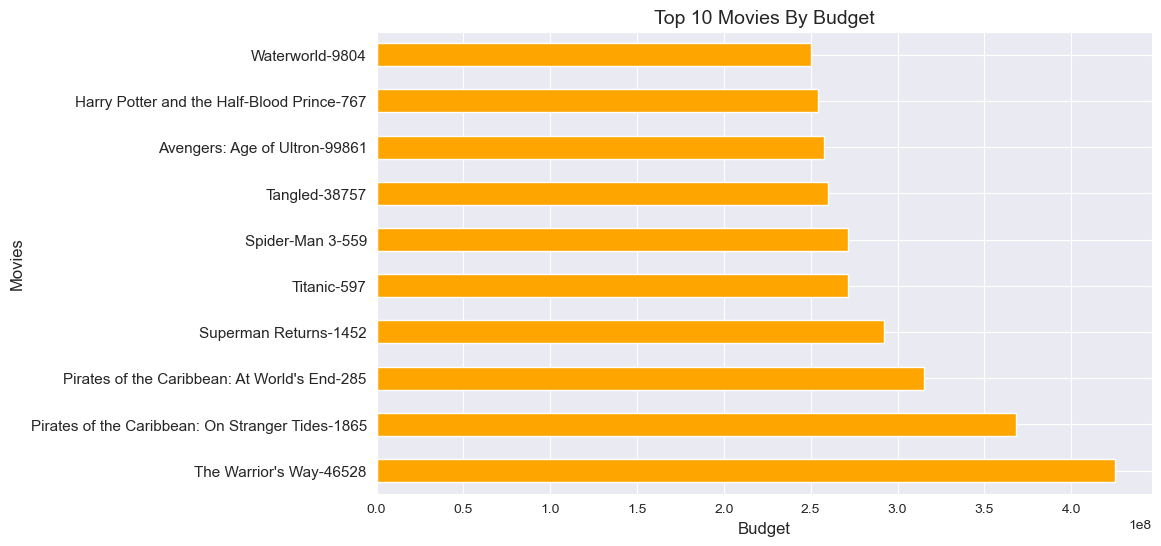

In [152]:
# plot the data

barplot(movies_budget[:10], "Top 10 Movies By Budget", xlabel='Budget', ylabel='Movies')

**Conclusion:** The movies with highest budget are The Warrior's Way (425 Million), Pirates of the Carribbean: On Stranger Tides (368 Million), and Pirates of the Caribbean: At World's End (315 Million).

### Research Question 10: The movies with the highest revenue

In [153]:
# group revenue by movie title

movies_revenue = df.groupby('movie_title')['revenue_adj'].sum().sort_values(ascending=False)

# print top 10 movies with the highest revenue

print('Movies with the highest revenue are:')
movies_revenue[:10]

Movies with the highest revenue are:


movie_title
Avatar-19995                            2.827124e+09
Star Wars-11                            2.789712e+09
Titanic-597                             2.506406e+09
The Exorcist-9552                       2.167325e+09
Jaws-578                                1.907006e+09
Star Wars: The Force Awakens-140607     1.902723e+09
E.T. the Extra-Terrestrial-601          1.791694e+09
The Net-1642                            1.583050e+09
One Hundred and One Dalmatians-12230    1.574815e+09
The Avengers-24428                      1.443191e+09
Name: revenue_adj, dtype: float64

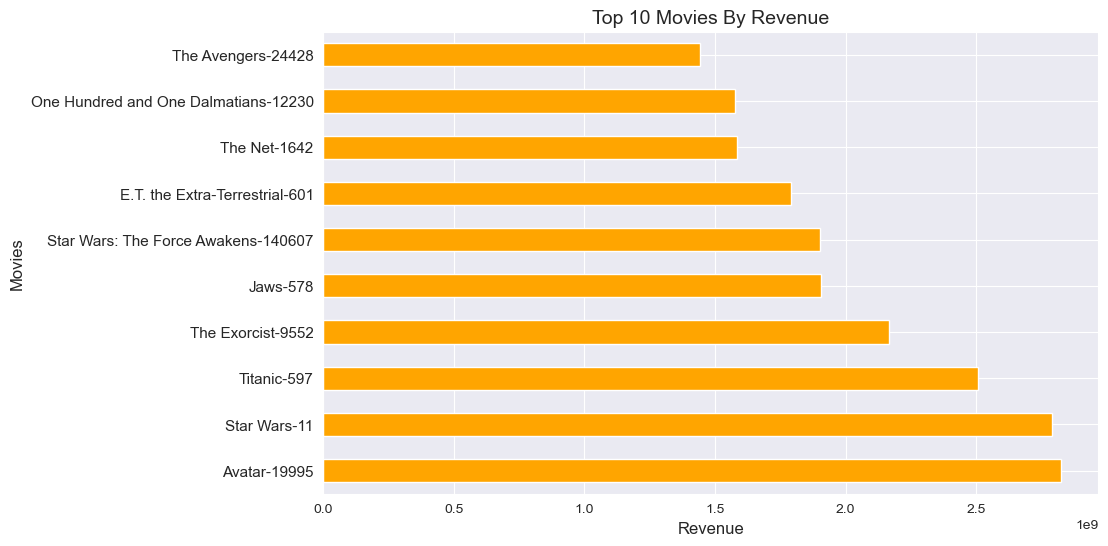

In [154]:
# plot the data

barplot(movies_revenue[:10], "Top 10 Movies By Revenue", xlabel='Revenue', ylabel='Movies')

**Conclusion:** The movies that made the highest revenue are Avatar (2.8 Billion), Star Wars (2.7 Billion), and Titanic (2.5 Billion).

### Research Question 11: The movies with highest and lowest average rating?

In [155]:
# group vote average by movie title

movies_rating = df.groupby('movie_title')['vote_average'].sum().sort_values(ascending=False)

# print top 10 movies with the highest rating

print('Movies with the highest ratings are:')
print(movies_rating[:10])

Movies with the highest ratings are:
movie_title
Pink Floyd: Pulse-24970                                                  8.7
A Personal Journey with Martin Scorsese Through American Movies-55676    8.5
Queen - Rock Montreal-25093                                              8.5
The Art of Flight-68450                                                  8.5
The Jinx: The Life and Deaths of Robert Durst-321640                     8.4
Guten Tag, RamÃ³n-242575                                                 8.4
Stop Making Sense-24128                                                  8.4
The Shawshank Redemption-278                                             8.4
Iron Maiden: Flight 666-19105                                            8.3
The Godfather-238                                                        8.3
Name: vote_average, dtype: float64


In [156]:
# print the movies with the highest and lowest ratings

print('Details on the movies with the highest and lowest ratings:\n')

a = df[df['vote_average'] == movies_rating.max()].transpose()
b = df[df['vote_average'] == movies_rating.min()].transpose()
pd.concat([a,b], axis = 1)

Details on the movies with the highest and lowest ratings:



,6911,7772,10865
popularity,0.21201,0.12112,0.035919
cast,"[David Gilmour, Nick Mason, Richard Wright, Sa...","[Matthew Wolf, Amy Weber, Shaley Scott, Eliza ...","[Harold P. Warren, Tom Neyman, John Reynolds, ..."
director,[David Mallet],[Leigh Scott],[Harold P. Warren]
runtime,145,86,74
genres,[Music],"[Action, Adventure, Science Fiction]",[Horror]
production_companies,"[SMV Enterprises, Columbia Music Video, EMI]","[Asylum, The]",[Norm-Iris]
release_date,2006-07-09 00:00:00,2007-06-26 00:00:00,2066-11-15 00:00:00
vote_count,23,10,15
vote_average,8.7,1.5,1.5
release_year,2006,2007,1966


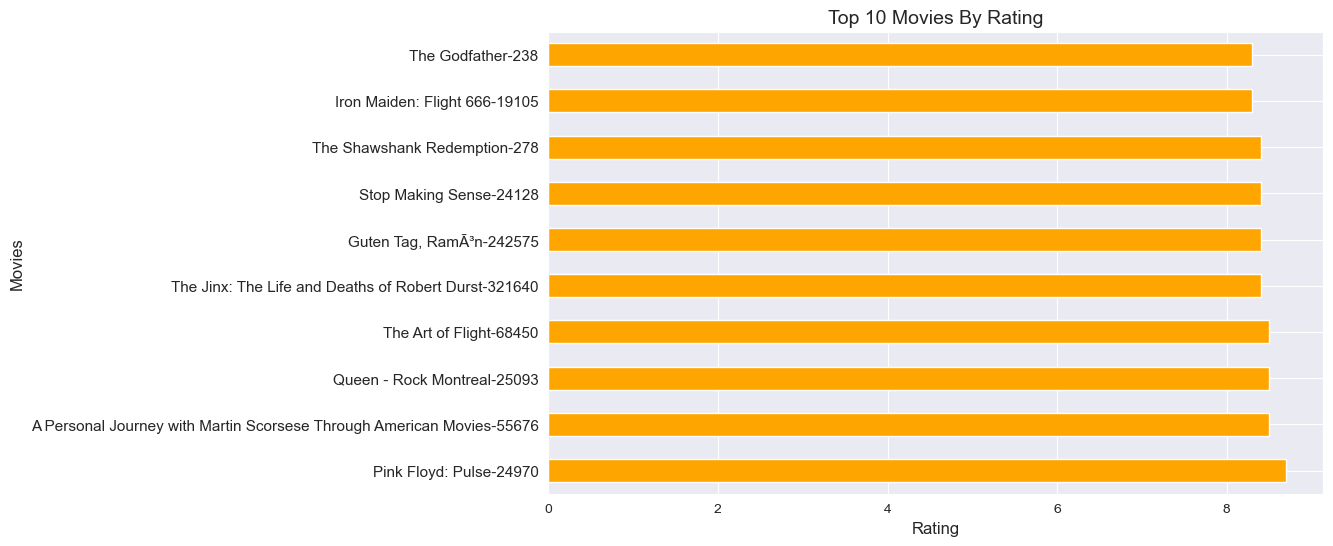

In [157]:
# plot the data

barplot(movies_rating[:10], "Top 10 Movies By Rating", xlabel='Rating', ylabel='Movies')

**Conclusion:** The movies with the highest ratings are Pink Floyd: Pulse (8.7), A Personal Journey with Martin Scorsese Through American Movies (8.5), and Queen - Rock Montreal (8.5).

### Research Question 12: The movies with highest and lowest runtime

In [158]:
# group runtime by movie title

movies_runtime = df.groupby('movie_title')['runtime'].sum().sort_values(ascending=False)

# print top 10 movies with the highest runtime

print('Top Ten Movies With The Highest Runtime Are:')
print(movies_runtime[:10])

Top Ten Movies With The Highest Runtime Are:
movie_title
Taken-150004                                                             877
Band of Brothers-331214                                                  705
Shoah-42044                                                              566
The Pacific-189197                                                       540
Life-220903                                                              500
Generation Kill-54102                                                    470
The Pillars of the Earth-367186                                          421
The Blue Planet-200813                                                   400
Crystal Lake Memories: The Complete History of Friday the 13th-222724    400
World Without End-139777                                                 389
Name: runtime, dtype: int64


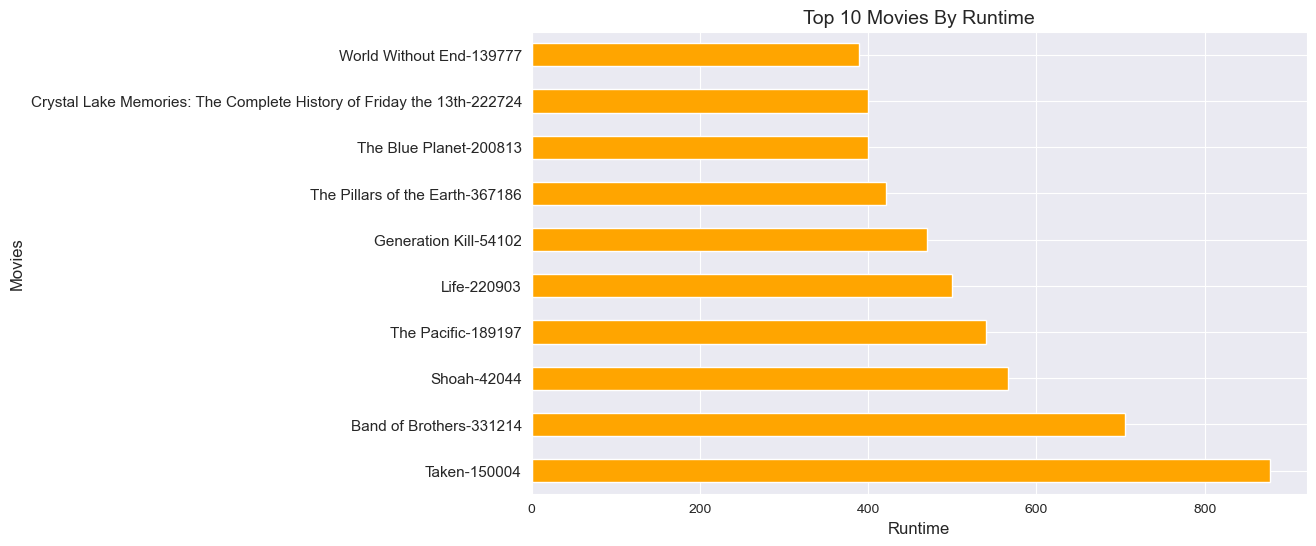

In [159]:
# plot the data

barplot(movies_runtime[:10], "Top 10 Movies By Runtime", xlabel='Runtime', ylabel='Movies')

**Conclusion:** The movies with the longest runtime are Taken (877), Band of Brothers (705), and Shoah (566).

<a id='conclusions'></a>
## Conclusions

- The properties that have a significant relationship with revenue are budget, vote count, and popularity
- Adventure is the most popular genre, while most movies released are Drama
- The best months to release movies based on popularity and revenue are: June, December, May, November, and July
- Runtime has been dropping over the years and movies with runtime of 100-200 are becoming more popular
- Woody Allen has directed the most movies, while Steven Spielberg is the most successful director based on profit
- Robert De Niro has appeared in 72 movies, making him the most featured actor
- Universal Pictures has produced the most movies, while Warner Bros. is the most successful based on profit
- The Warrior's Way, directed by Kate Bosworth is the movie with the largest budget and highest loss
- Star Wars made the highest profit and James Cameron's Avatar raked in the biggest revenue
- Pink Floyd: Pulse is the highest rated movie and Taken has the longest runtime of any movie.

>**Limitations** 

- The cast, directors, production companies, and the leading actor's gender may have a significant impact on movies' revenue or profit. But these were not explored due to the author's limited knowledge
- The majority of the entries in budget and revenue are 0s. Because of that, one cannot be 100% sure of the movies with the most and least budget, revenue, and profit
- The currency for budget and revenue were not provided. Hence, we assumed it is in USD

In [160]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

255